# CSI 4142 - Introduction to Data Science
# Assignment 4: Unsupervised Learning, Clustering and Recommendations.

Shacha Parker (300235525)\
Callum Frodsham and (300199446)\
Group 79

### Setup Instructions To Reproduce this Notebook:
(Step 1 Optional)
1. Create a virtual python environment in the project directory (if you want) for all of the packages required:  
``` 
python -m venv .venv
```
To enter the virutal environment: 
```
.venv/Scripts/activate.ps1 # on windows
source .venv/bin/activate # on mac/linux
```
2. Download all of the required packages (run in cmd/shell of choice):
```
pip install jupyter
pip install ipykernel
pip install pandas
pip install numpy
```
3. VSCode: Ensure you have the correct python kernel selected!
<br> 
If you are using a virtual environment, make sure to select the python interpreter for that virtual environment otherwise this will not work! If you have everything done globally, then just make sure the correct python kernel you are using is selected.

<h1>Dataset: </h1>
Author: Rounak Banik
<br>
Purpose: The purpose of this dataset is to provide insight on a largage amount of movie data comprised of 45,000 movies released on or before July 2017 and 26 million accompanying ratings from 270,000 users of the GroupLens website. 
<br>
Shape: This dataset is composed of 24 columns, 45466 rows.
<br><br>
Link: <a href="https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset"> The Movies Dataset</a>
<br>

Note: The "homepage", "poster_path" and "video" features will be omitted as they serve no purpose in notebook. (since we don't have access to any of the files they're referencing.)
<h3>Dataset Feature List: </h3>
movies_metadata.csv:
<ol>
    <li>adult:
    <br>
    Feature Type: Categorical
    <br>
    Description: Indicates if the movie is X-rated or not.
    </li>
    <li>belongs_to_collection:
    <br>
    Feature Type: Categorical
    <br>
    Description: Stringified dictionary that indicates which collection of films the movie belongs to. Empty if no collection.
    </li>
    <li>budget:
    <br>
    Feature Type: Numerical
    <br>
    Description: The budget of the film in dollars (USD). 0 if budget is unknown.
    </li>
    <li>genres:
    <br>
    Feature Type: Categorical
    <br>
    Description: Stringified list of dictionaries, that include the films genre(s).
    </li>
    <li>original_language:
    <br>
    Feature Type: Categorical
    <br>
    Description: The film's language of origin.
    </li>
    <li>original_title:
    <br>
    Feature Type: Categorical
    <br>
    Description: The original title of the movie on release.
    </li>
    <li>overview:
    <br>
    Feature Type: Categorical
    <br>
    Description: A brief description of the movie.
    </li>
    <li>popularity:
    <br>
    Feature Type: Numerical
    <br>
    Description: The popularity score as assigned by TMDB.
    </li>
    <li>production_companies:
    <br>
    Feature Type: Categorical
    <br>
    Description: Stringified list of production companies involved in creating the movie.
    </li>
    <li>production_countries:
    <br>
    Feature Type: Categorical
    <br>
    Description: Stringified list of countries where the film was shot in.
    </li>
    <li>release_data:
    <br>
    Feature Type: Numerical
    <br>
    Description: The release date of the movie.
    </li>
    <li>revenue:
    <br>
    Feature Type: Numerical
    <br>
    Description: Total revenue of the film in dollars.
    </li>
    <li>runtime:
    <br>
    Feature Type: Numerical
    <br>
    Description: The runtime of the film in minutes.
    </li>
    <li>spoken_languages:
    <br>
    Feature Type: Categorical
    <br>
    Description: Stringified list of dictionaries of the languages spoken in the film.
    </li>
    <li>status:
    <br>
    Feature Type: Categorical
    <br>
    Description: The release status of the film, with categories: 'Released', 'Rumored', 'Post Production', 'In Production', 'Planned', 'Canceled'
    </li>
    <li>Tagline:
    <br>
    Feature Type: Categorical
    <br>
    Description: The tagline of the movie.
    </li>
    <li>title:
    <br>
    Feature Type: Categorical
    <br>
    Description: The title of the movie.
    </li>
    <li>vote_average:
    <br>
    Feature Type: Numerical
    <br>
    Description: The average rating of the movie.
    </li>
    <li>vote_count:
    <br>
    Feature Type: Numerical
    <br>
    Description: The number number of votes by users as counted by TMDB.
    </li>
</ol>

In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans, DBSCAN
import Levenshtein as le
import heapq
import ast
import matplotlib.pyplot as plt

# load the dataset
dataset = pd.read_csv("movies_metadata.csv")

# drop the unused columns mentioned above:
dataset.drop(columns=['homepage', 'poster_path', 'video'], inplace=True)
print(dataset.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'id', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count'],
      dtype='object')


C:\Users\larry\AppData\Local\Temp\ipykernel_22604\4147021361.py:12: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("movies_metadata.csv")


## Data Cleaning:

In [333]:
# get the general info of the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   id                     45466 non-null  object 
 5   imdb_id                45449 non-null  object 
 6   original_language      45455 non-null  object 
 7   original_title         45466 non-null  object 
 8   overview               44512 non-null  object 
 9   popularity             45461 non-null  object 
 10  production_companies   45463 non-null  object 
 11  production_countries   45463 non-null  object 
 12  release_date           45379 non-null  object 
 13  revenue                45460 non-null  float64
 14  runtime                45203 non-null  float64
 15  sp

In [334]:
# check which columns have missing values:
missing_values = dataset.isna().sum()
print(missing_values)


adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
vote_average                 6
vote_count                   6
dtype: int64


<h5>Original language data imputation: </h5>
The original language is missing 11 data points, however, we can manually impute using data from rotten tomatoes.
Since rotten tomatoes does not have an easily accessible api, and using an API for only 11 data points would be a little silly, we shall manually get the data for each point!

In [335]:
# get the or language
missing_language = dataset['original_language'].isna()

# get the indices of the missing vals
print(dataset[missing_language]['title'])  

missing_language_input_vals = [ "en",
                                "en",
                                "en",
                                "en",
                                "cs",
                                "en",
                                "zxx", # silent film ISO code
                                "en",
                                "en",
                                "en",
                                "zxx" # also a silent film.
                                ]
# get the indices of the missing values.
missing_language_indices = list(dataset[missing_language].index)

# fill in the values:
for i, row_num  in enumerate(missing_language_indices):
    dataset.at[row_num, 'original_language'] = missing_language_input_vals[i]

print(f"New NaN Value count for the original language feature: {dataset['original_language'].isna().sum()}")

19574       Shadowing the Third Man
21602                Unfinished Sky
22832               13 Fighting Men
32141                     Lambchops
37407                 Prince Bayaya
41047                Song of Lahore
41872    Annabelle Serpentine Dance
44057         Lettre d'une inconnue
44410                          Yarn
44576                        WiNWiN
44655    The Surrender of Tournavos
Name: title, dtype: object
New NaN Value count for the original language feature: 0


We are going to fill the 6 null title rows with their "original_title" counterpart. 

In [336]:
# get the or language
missing_titles = dataset['title'].isna()

# lets see which titles are valid: 
dataset[missing_titles]['original_title']


19729                                Midnight Man
19730    [{'iso_639_1': 'en', 'name': 'English'}]
29502                            マルドゥック・スクランブル 排気
29503        [{'iso_639_1': 'ja', 'name': '日本語'}]
35586                            Avalanche Sharks
35587    [{'iso_639_1': 'en', 'name': 'English'}]
Name: original_title, dtype: object

It is clear that some of the original title values are not valid, and fail the format checking. (because it also just so happens that these are the only 3 values that fail the format check of the 'original_title' feature) Thus, we will only update the 'title' feature for rows 19729, 29502, and 35586, and remove the other 3.

In [337]:
# remove the missing titles.
remove_titles = [35587, 29503,19730]
dataset.drop(index=remove_titles, inplace=True)

# get new missing_titles
missing_titles = dataset['title'].isna()
dataset[missing_titles]['original_title']

# update the other 3 missing title values using the original title.
dataset.loc[missing_titles, 'title'] = dataset.loc[missing_titles, 'original_title'] 

# show the fixed titles!
dataset[missing_titles]['title']

19729        Midnight Man
29502    マルドゥック・スクランブル 排気
35586    Avalanche Sharks
Name: title, dtype: object

Row Removal Rationalization: <br>
Since the dataset has 45000 some rows, we will be able to remove a small amount of rows without affecting the quality of the data. 
We will be removing all NULL rows in these features: popularity, production_countries, production_companies, release_date, status, vote_average, vote_count, and runtime.

Runtime has a lot of missing values, specifically, 242. These will be removed, but overview will not because that would include 1/45th the dataset approximately, and sometimes movies don't have a succint overview. Thus, all of the missing overview values will be kept. 

In [338]:
# remove them all in one fell swoop:
dataset.dropna(subset=['popularity', 'production_countries', 'production_companies', 'release_date', 'status', 'vote_average', 'vote_count','runtime', 'imdb_id'], inplace=True)
dataset.isna().sum()


adult                        0
belongs_to_collection    40565
budget                       0
genres                       0
id                           0
imdb_id                      0
original_language            0
original_title               0
overview                   683
popularity                   0
production_companies         0
production_countries         0
release_date                 0
revenue                      0
runtime                      0
spoken_languages             0
status                       0
tagline                  24659
title                        0
vote_average                 0
vote_count                   0
dtype: int64

In [339]:
# budget has the wrong datatype, convert it to int.
dataset['budget'] = pd.to_numeric(dataset['budget'], errors='coerce')

sum_budet = (dataset['budget'] == 0).sum()
sum_revenue = (dataset['revenue'] == 0).sum()
print(sum_revenue)
print(sum_budet)

# ensure IDs are all numeric as well
dataset['id'] = pd.to_numeric(dataset['id'], errors='coerce')

# ensure popularity values are all numeric:
dataset['popularity'] = pd.to_numeric(dataset['popularity'], errors='coerce')

dataset.info()


37642
36170
<class 'pandas.core.frame.DataFrame'>
Index: 45042 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45042 non-null  object 
 1   belongs_to_collection  4477 non-null   object 
 2   budget                 45042 non-null  int64  
 3   genres                 45042 non-null  object 
 4   id                     45042 non-null  int64  
 5   imdb_id                45042 non-null  object 
 6   original_language      45042 non-null  object 
 7   original_title         45042 non-null  object 
 8   overview               44359 non-null  object 
 9   popularity             45042 non-null  float64
 10  production_companies   45042 non-null  object 
 11  production_countries   45042 non-null  object 
 12  release_date           45042 non-null  object 
 13  revenue                45042 non-null  float64
 14  runtime                45042 non-null  float64


## EDA:

## Study 1: Similarity Measures 
Attribute subsets chosen: title, budget, popularity, vote_count, genre


### First Subset: title
Similarity measure: Levenshtein Distance

In [340]:
chosen_title = 'Star Wars'
# going to use a priority queue to get the top 10:
pq = []
for idx, row in dataset.iterrows():
    title = row['title']
    if title == chosen_title:
        continue
    word_distance = le.distance(chosen_title, title)
    if len(pq) < 10:
        heapq.heappush(pq, (-word_distance, [title, idx]))
    else:
        heapq.heappushpop(pq, (-word_distance, [title, idx]))

# Switch the values from negative to positive:
for i in range(0, len(pq)):
    pq[i] = (-pq[i][0], pq[i][1])
# sort them from least to greatest
pq.sort(key=lambda x: x[0])

print(f"Top 10 titles similar to: {chosen_title}")
title_indices = []
for idx, item in enumerate(pq):
    title_indices.append(item[1][1])
    print(f'{idx +1}. title: {item[1][0]}, distance:{item[0]}')
dataset.loc[title_indices, ['title','runtime', 'release_date', 'popularity', 'genres']]

Top 10 titles similar to: Star Wars
1. title: Star Maps, distance:2
2. title: Beer Wars, distance:3
3. title: Style Wars, distance:3
4. title: Flag Wars, distance:3
5. title: Road Wars, distance:3
6. title: Stars & Bars, distance:4
7. title: Strays, distance:4
8. title: Summer Wars, distance:4
9. title: Word Wars, distance:4
10. title: Triad Wars, distance:4


,title,runtime,release_date,popularity,genres
1540,Star Maps,86.0,1997-07-23,0.725694,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
14298,Beer Wars,89.0,2009-04-16,0.876713,"[{'id': 99, 'name': 'Documentary'}]"
9179,Style Wars,70.0,1983-01-01,0.870267,"[{'id': 10402, 'name': 'Music'}, {'id': 99, 'n..."
35876,Flag Wars,86.0,2003-05-01,0.102116,"[{'id': 99, 'name': 'Documentary'}]"
31843,Road Wars,90.0,2015-05-05,1.249170,"[{'id': 878, 'name': 'Science Fiction'}, {'id'..."
2135,Stars & Bars,94.0,1988-03-18,0.403170,"[{'id': 35, 'name': 'Comedy'}]"
37860,Strays,105.0,1997-01-18,3.013494,"[{'id': 18, 'name': 'Drama'}]"
16774,Summer Wars,114.0,2009-08-01,12.653798,"[{'id': 16, 'name': 'Animation'}]"
9503,Word Wars,80.0,2004-05-28,0.549944,"[{'id': 99, 'name': 'Documentary'}]"
33712,Triad Wars,112.0,2008-02-28,1.764311,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."


### Second Subset: budget
Similarity measure: Manhattan Distance

In [ ]:
# chosen movie is Interview with the Vampire, and the budget can be seen below:
chosen_title = 'Interview with the Vampire'
chosen_movie_budget = (dataset.loc[dataset['title'] == chosen_title, 'budget']).item()
# going to use a priority queue to get the top 10:
pq = []
for idx, row in dataset.iterrows():
    cur_movie_budget = row['budget']
    if cur_movie_budget == chosen_movie_budget:
        continue
    budget_distance = abs(chosen_movie_budget - cur_movie_budget)
    # budget distance is always negative to ensure the heapq "kicks out" larger values.
    if len(pq) < 10:
        heapq.heappush(pq, (-budget_distance, [row['title'], cur_movie_budget, idx]))
    else:
        heapq.heappushpop(pq, (-budget_distance, [row['title'], cur_movie_budget, idx]))

# reverse the negative value
for i in range(0, len(pq)):
    pq[i] = (-pq[i][0], pq[i][1])
pq.sort(key = lambda x: x[0])
budget_indices = []
# get the indices and print out the values:
for idx, item in enumerate(pq):
    budget_indices.append(item[1][-1])
    print(f'{idx +1}. title: {item[1][0]}, budget: {item[1][1]}, budget distance: {item[0]}')
dataset.loc[budget_indices, ['title','runtime', 'release_date', 'popularity', 'genres']]

1. title: The Mermaid, budget: 60720000, budget distance: 720000
2. title: Perfect Stranger, budget: 60795000, budget distance: 795000
3. title: 2 Guns, budget: 61000000, budget distance: 1000000
4. title: Astérix and Obélix: God Save Britannia, budget: 61000000, budget distance: 1000000
5. title: Gone Girl, budget: 61000000, budget distance: 1000000
6. title: Maze Runner: The Scorch Trials, budget: 61000000, budget distance: 1000000
7. title: Ice Age, budget: 59000000, budget distance: 1000000
8. title: Les Misérables, budget: 61000000, budget distance: 1000000
9. title: Shooter, budget: 61000000, budget distance: 1000000
10. title: American Sniper, budget: 58800000, budget distance: 1200000


,title,runtime,release_date,popularity,genres
37460,The Mermaid,93.0,2016-02-08,5.296052,"[{'id': 35, 'name': 'Comedy'}, {'id': 878, 'na..."
11745,Perfect Stranger,109.0,2007-04-12,9.925255,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
21337,2 Guns,109.0,2013-08-02,13.336512,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam..."
19641,Astérix and Obélix: God Save Britannia,110.0,2012-10-17,9.722726,"[{'id': 10751, 'name': 'Family'}, {'id': 12, '..."
23675,Gone Girl,145.0,2014-10-01,154.801009,"[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '..."
25206,Maze Runner: The Scorch Trials,132.0,2015-09-09,41.225769,"[{'id': 28, 'name': 'Action'}]"
5084,Ice Age,81.0,2002-03-10,17.328902,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '..."
20062,Les Misérables,157.0,2012-12-18,13.524080,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n..."
11692,Shooter,124.0,2007-03-22,14.246918,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam..."
24241,American Sniper,133.0,2014-12-11,19.228561,"[{'id': 10752, 'name': 'War'}, {'id': 28, 'nam..."


### Third Subset: popularity
Similarity measure: Manhattan Distance

In [342]:
# # chosen movie is Interview with the Vampire, and the budget can be seen below:
chosen_title = 'Jumanji'
chosen_movie_popularity = (dataset.loc[dataset['title'] == chosen_title, 'popularity']).item()
print(f'Popularity of {chosen_title}: {chosen_movie_popularity}')
# going to use a priority queue to get the top 10:
pq = []

for idx, row in dataset.iterrows():
    cur_movie_popularity = row['popularity']
    if cur_movie_popularity == chosen_movie_popularity:
        continue
    popularity_distance = abs(chosen_movie_popularity - cur_movie_popularity)
    # budget distance is always negative to ensure the heapq "kicks out" larger values.
    if len(pq) < 10:
        heapq.heappush(pq, (-popularity_distance, [row['title'], cur_movie_popularity, idx]))
    else:
        heapq.heappushpop(pq, (-popularity_distance, [row['title'], cur_movie_popularity, idx]))

# reverse the negative value
for i in range(0, len(pq)):
    pq[i] = (-pq[i][0], pq[i][1])
pq.sort(key = lambda x: x[0])
popularity_indices = []
# get the indices and print out the values:
for idx, item in enumerate(pq):
    popularity_indices.append(item[1][-1])
    print(f'{idx +1}. title: {item[1][0]}, popularity: {item[1][1]}, popularity distance: {item[0]}')
dataset.loc[popularity_indices, ['title','runtime', 'release_date', 'popularity', 'genres']]

Popularity of Jumanji: 17.015539
1. title: Paul Blart: Mall Cop 2, popularity: 17.02038, popularity distance: 0.004840999999998985
2. title: The Boy, popularity: 17.028854, popularity distance: 0.013314999999998633
3. title: Mine, popularity: 17.029573, popularity distance: 0.01403399999999877
4. title: Independence Day: Resurgence, popularity: 16.993841, popularity distance: 0.02169800000000066
5. title: Batman & Robin, popularity: 17.038824, popularity distance: 0.023285000000001332
6. title: When the Bough Breaks, popularity: 17.046052, popularity distance: 0.030512999999999124
7. title: Blade II, popularity: 17.05064, popularity distance: 0.03510100000000094
8. title: The Social Network, popularity: 16.972995, popularity distance: 0.04254399999999947
9. title: Smurfs: The Lost Village, popularity: 16.972835, popularity distance: 0.04270400000000052
10. title: Toy Story 3, popularity: 16.96647, popularity distance: 0.04906899999999936


,title,runtime,release_date,popularity,genres
29337,Paul Blart: Mall Cop 2,94.0,2015-04-16,17.020380,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam..."
36087,The Boy,97.0,2016-01-22,17.028854,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n..."
42426,Mine,106.0,2016-10-06,17.029573,"[{'id': 53, 'name': 'Thriller'}, {'id': 10752,..."
30556,Independence Day: Resurgence,120.0,2016-06-22,16.993841,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
1491,Batman & Robin,125.0,1997-06-20,17.038824,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
41994,When the Bough Breaks,97.0,2016-09-09,17.046052,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '..."
5120,Blade II,117.0,2002-03-22,17.050640,"[{'id': 14, 'name': 'Fantasy'}, {'id': 27, 'na..."
15798,The Social Network,120.0,2010-09-30,16.972995,"[{'id': 18, 'name': 'Drama'}]"
43156,Smurfs: The Lost Village,89.0,2017-03-23,16.972835,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '..."
15348,Toy Story 3,103.0,2010-06-16,16.966470,"[{'id': 16, 'name': 'Animation'}, {'id': 10751..."


### Fourth Subset: vote_count 
Similarity measure: Hamming

Steps: Find the larget integer, and then pick the maximum bit length to use for comparisons.

In [362]:
def calc_hamming_similarity_bits(num1:int, num2:int, max_bit_length:int):
    str1 = format(num1, f'0{max_bit_length}b')
    str2 = format(num2, f'0{max_bit_length}b')
    return sum(char1 != char2 for char1, char2 in zip(str1, str2))

# get the largest value 
max_bit_length = int(dataset['vote_count'].max()).bit_length()
print(max_bit_length)
# so we shall use 14 bits for our hamming similarity measure calculation.
chosen_title = 'The Little Mermaid'

# there are two little mermaids, get the first one. (the most popular)
chosen_movie_info = list(dict((dataset.loc[dataset['title'] == chosen_title, 'vote_count'])).items())
chosen_movie_vote_count = int(chosen_movie_info[0][-1])
print(f'{chosen_title} Vote Count: {chosen_movie_vote_count}')
chosen_movie_index = chosen_movie_info[0][0]

pq = []
for idx, row in dataset.iterrows():
    if idx == chosen_movie_index:
        continue
    cur_movie_vote_count = int(row['vote_count'])
    hamming_similarity = calc_hamming_similarity_bits(chosen_movie_vote_count, cur_movie_vote_count, max_bit_length)

    if len(pq) < 10:
        heapq.heappush(pq,  (-hamming_similarity, [row['title'], cur_movie_vote_count, idx])) 
    else:
        heapq.heappushpop(pq, (-hamming_similarity, [row['title'], cur_movie_vote_count, idx]))
           
# reverse the negative value
for i in range(0, len(pq)):
    pq[i] = (-pq[i][0], pq[i][1])
pq.sort(key = lambda x: x[0])

vote_count_indices = []
for idx, item in enumerate(pq):
    vote_count_indices.append(item[1][-1])
    print(f'{idx +1}. title: {item[1][0]}, vote_count: {item[1][1]}, vote_count distance: {item[0]}')
dataset.loc[vote_count_indices, ['title','runtime', 'release_date', 'popularity', 'genres']]


14
The Little Mermaid Vote Count: 1921
1. title: Die Hard 2, vote_count: 1920, vote_count distance: 1
2. title: Moneyball, vote_count: 1409, vote_count distance: 1
3. title: Les Misérables, vote_count: 1925, vote_count distance: 1
4. title: Shame, vote_count: 897, vote_count distance: 1
5. title: Kung Fu Panda 2, vote_count: 1925, vote_count distance: 1
6. title: Training Day, vote_count: 1665, vote_count distance: 1
7. title: This Means War, vote_count: 1411, vote_count distance: 2
8. title: Valerian and the City of a Thousand Planets, vote_count: 905, vote_count distance: 2
9. title: V/H/S, vote_count: 385, vote_count distance: 2
10. title: Wild, vote_count: 961, vote_count distance: 2


,title,runtime,release_date,popularity,genres
1321,Die Hard 2,124.0,1990-07-02,18.785984,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
17758,Moneyball,133.0,2011-09-22,15.785663,"[{'id': 18, 'name': 'Drama'}]"
20062,Les Misérables,157.0,2012-12-18,13.524080,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n..."
18010,Shame,100.0,2011-10-02,11.720490,"[{'id': 18, 'name': 'Drama'}]"
17213,Kung Fu Panda 2,91.0,2011-05-25,11.481921,"[{'id': 16, 'name': 'Animation'}, {'id': 10751..."
4646,Training Day,122.0,2001-10-05,13.664622,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam..."
18678,This Means War,103.0,2012-02-14,12.366641,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam..."
44337,Valerian and the City of a Thousand Planets,137.0,2017-07-20,15.262706,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ..."
19457,V/H/S,116.0,2012-07-28,7.820787,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n..."
25467,Wild,115.0,2014-12-05,11.209154,"[{'id': 18, 'name': 'Drama'}]"


### Fifth Subset: genres
Similarity measure: Jaccard Similarity

In [344]:
# create function that converts the genre format into a list of genres.
def convert_genre_str_to_list(genre_list_str:str):
    dict_list = ast.literal_eval(genre_list_str)
    genre_list = []
    for item in dict_list:
        genre_list.append(item['name'])
    return genre_list
# since sci-kit wants us to encode our genres: lets not do that and make our own function
def jaccard_similarity(genres_a, genres_b):
    set_genres_a = set(genres_a)
    set_genres_b = set(genres_b)
    intersection_of_sets = set_genres_a & set_genres_b
    union_of_sets = set_genres_a | set_genres_b
    if len(union_of_sets) == 0:
        return 0
    return len(intersection_of_sets) / len(union_of_sets)     

# pick a title: 
chosen_title = 'Astérix and Obélix: God Save Britannia'
# get the genres: (and convert)
chosen_movie_genres = convert_genre_str_to_list((dataset.loc[dataset['title'] == chosen_title, 'genres']).item())
chosen_movie_index = (dataset.loc[dataset['title'] == chosen_title, 'genres']).index.item()
pq = []
for idx, row in dataset.iterrows():
    cur_movie_genres = convert_genre_str_to_list(row['genres'])
    if idx == chosen_movie_index:
        continue
    genre_similarity = jaccard_similarity(chosen_movie_genres, cur_movie_genres)
    # budget distance is always negative to ensure the heapq "kicks out" larger values.
    if len(pq) < 10:
        heapq.heappush(pq, (genre_similarity, [row['title'], cur_movie_genres, idx]))
    # remove the first smallest item, and push one with larger similarity:
    elif pq[0][0] < genre_similarity:
        heapq.heappop(pq)
        heapq.heappush(pq, (genre_similarity, [row['title'], cur_movie_genres, idx]))

pq.sort(key = lambda x: x[0], reverse=True)

genres_indices = []
for idx, item in enumerate(pq):
    genres_indices.append(item[1][-1])
    print(f'{idx +1}. title: {item[1][0]}, genres: {item[1][1]}, jaccard similarity: {item[0]}')
dataset.loc[genres_indices, ['title','runtime', 'release_date', 'popularity', 'vote_average']]

1. title: Buddy, genres: ['Adventure', 'Comedy', 'Family'], jaccard similarity: 1.0
2. title: Lemony Snicket's A Series of Unfortunate Events, genres: ['Adventure', 'Comedy', 'Family'], jaccard similarity: 1.0
3. title: Dunston Checks In, genres: ['Adventure', 'Comedy', 'Family'], jaccard similarity: 1.0
4. title: Major Payne, genres: ['Adventure', 'Comedy', 'Family'], jaccard similarity: 1.0
5. title: Sky High, genres: ['Adventure', 'Comedy', 'Family'], jaccard similarity: 1.0
6. title: Troop Beverly Hills, genres: ['Adventure', 'Comedy', 'Family'], jaccard similarity: 1.0
7. title: The Muppet Movie, genres: ['Adventure', 'Comedy', 'Family'], jaccard similarity: 1.0
8. title: Snow Dogs, genres: ['Adventure', 'Comedy', 'Family'], jaccard similarity: 1.0
9. title: The Goonies, genres: ['Adventure', 'Comedy', 'Family'], jaccard similarity: 1.0
10. title: The Country Bears, genres: ['Adventure', 'Comedy', 'Family'], jaccard similarity: 1.0


,title,runtime,release_date,popularity,vote_average
1481,Buddy,84.0,1997-06-06,2.022706,3.9
9392,Lemony Snicket's A Series of Unfortunate Events,108.0,2004-12-16,12.817945,6.7
86,Dunston Checks In,88.0,1996-01-12,4.814825,5.1
263,Major Payne,95.0,1995-03-24,9.253362,6.1
10226,Sky High,100.0,2005-07-29,8.061423,5.8
4547,Troop Beverly Hills,105.0,1989-03-22,3.196522,5.6
3277,The Muppet Movie,97.0,1979-05-31,6.769866,7.0
4918,Snow Dogs,99.0,2002-01-18,13.470227,5.3
1896,The Goonies,114.0,1985-06-06,14.280703,7.4
5348,The Country Bears,88.0,2002-07-26,7.007574,4.3


### Study 1 Results and Analysis:
1. The Levenshtein distance algorithm worked wonderfully to provide similarity values for the textual 'title' attribute. The top 10 values are illustrated under the corresponding code block, but some of the movies seem to be parodies of the chosen 'Star Wars' title. Like 'Beer Wars' for example.
2. The manhattan distance for the budget provided movies similar in budget as the selected movie, however just because they have a similar budget does not mean that they have any other similar features.
3. Manhattan distance seemed a bit more appropriate for finding possible movies to recommend based on the selected title because it could allow you to find movies that are similarly popular or unpopular. 
4. Hamming similarity showed inconsistencies in the implemention I chose, where I converted each value into their binary representation, and then appended 0's until they were as long as the largest value found in the vote_count attribute. For example, Moneyball was deemed to be #2 in the list even though it had a vote_count of 1409 compared to the chosen title's (The Little Mermaid) vote count of 1921. This is because one missing binary number can be the only difference, but when it comes to actual value it makes a large difference. Thus, the implementation chosen was flawed for comparing movies that have a similar amount of votes.
5. Jaccard Similarity worked perfectly for finding movies that have the same (or similar) genres to the chosen movie. For example, top 10 movies similar to 'Astérix and Obélix: God Save Britannia' using jaccard similarity on the genres attribute we're all movies that have the exact same genres.  

## Study 2: Clustering Algorithms
The chosen attributes for each visualization will be, popularity vs budget, vote_count vs budget. We will be comparing the results from two different clustering algorithms on these attributes, specifically, DBSCAN, and KMeans.



### K-Means

K Means on Popularity Vs. Budget with k = 2.

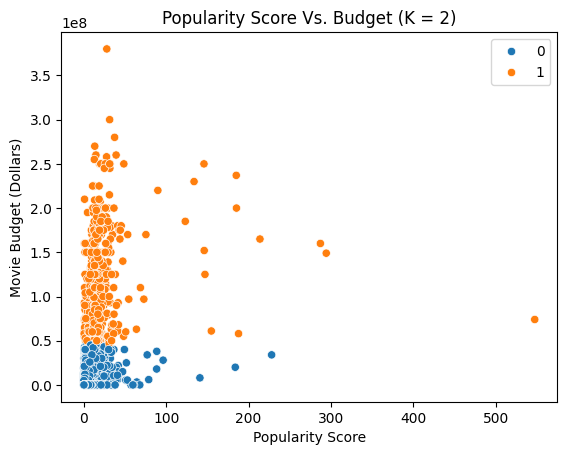

In [345]:
# popularity vs budget kmeans separation
x_pop_budget = dataset[['popularity', 'budget']].to_numpy(copy=True)

# running k means algo
k_means = KMeans(n_clusters=2, random_state=23, n_init='auto').fit(x_pop_budget)

sns.scatterplot(data=dataset, x=dataset['popularity'], y=dataset['budget'], hue=list(k_means.labels_))
plt.title('Popularity Score Vs. Budget (K = 2)')
plt.xlabel('Popularity Score')
plt.ylabel('Movie Budget (Dollars)')
plt.show()

K Means on Popularity Vs. Budget with k = 4.

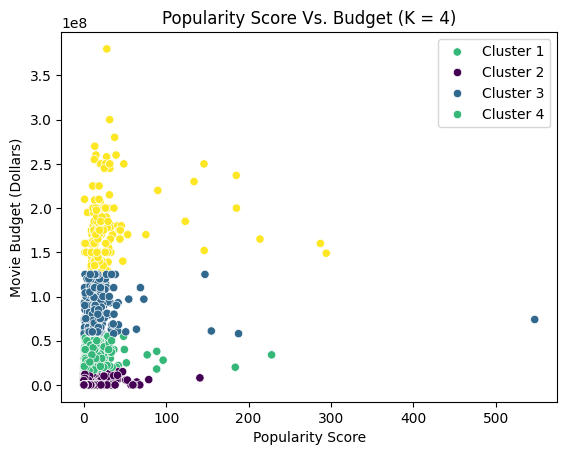

In [361]:
# running k means algo, with k =4
k_means = KMeans(n_clusters=4, random_state=23, n_init='auto').fit(x_pop_budget)

sns.scatterplot(data=dataset, x=dataset['popularity'], y=dataset['budget'], hue=list(k_means.labels_), palette= 'viridis')
plt.title('Popularity Score Vs. Budget (K = 4)')
plt.xlabel('Popularity Score')
plt.ylabel('Movie Budget (Dollars)')
plt.legend(labels=['Cluster 1','Cluster 2','Cluster 3','Cluster 4'])
plt.show()


K Means on Vote Count Vs. Budget with k = 2.

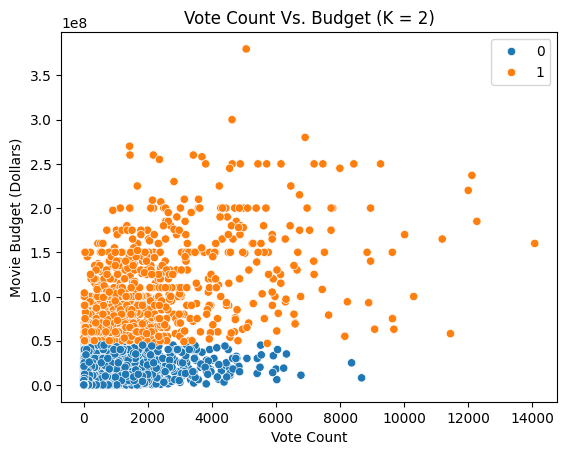

In [347]:
# popularity vs budget kmeans separation
x_vote_budget = dataset[['vote_count', 'budget']].to_numpy(copy=True)

# running k means algo
k_means = KMeans(n_clusters=2, random_state=23, n_init='auto').fit(x_vote_budget)

sns.scatterplot(data=dataset, x=dataset['vote_count'], y=dataset['budget'], hue=list(k_means.labels_))
plt.title('Vote Count Vs. Budget (K = 2)')
plt.xlabel('Vote Count')
plt.ylabel('Movie Budget (Dollars)')
plt.show()

K Means on Vote Count Vs. Budget with k = 4.

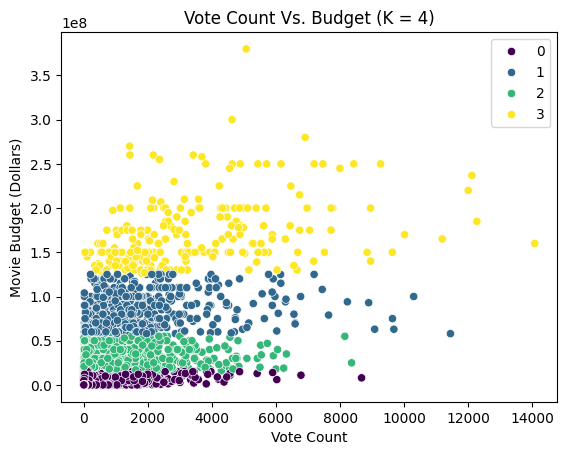

In [348]:
# running k means algo
k_means = KMeans(n_clusters=4, random_state=23, n_init='auto').fit(x_vote_budget)

sns.scatterplot(data=dataset, x=dataset['vote_count'], y=dataset['budget'], hue=list(k_means.labels_), palette='viridis')
plt.title('Vote Count Vs. Budget (K = 4)')
plt.xlabel('Vote Count')
plt.ylabel('Movie Budget (Dollars)')
plt.show()

### DBSCAN

DBSCAN on Popularity Vs. Budget with EPS = 15, and min_samples = 5.

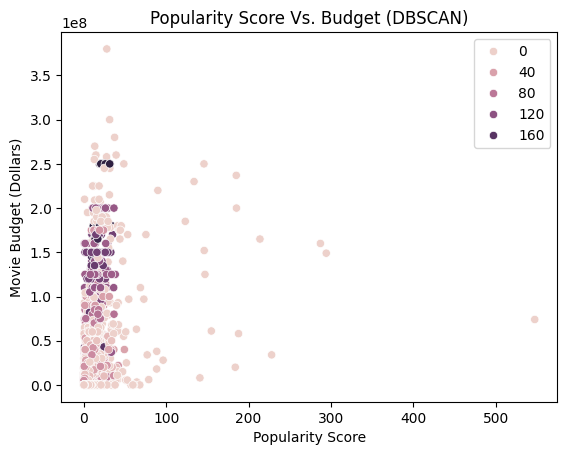

In [349]:
# DBSCAN with EPS = 15, and min samples = 5
dbscan_cluster = DBSCAN(eps=15, min_samples=5).fit(x_pop_budget)
sns.scatterplot(data=dataset, x=dataset['popularity'], y=dataset['budget'], hue=list(dbscan_cluster.labels_))
plt.title('Popularity Score Vs. Budget (DBSCAN)')
plt.xlabel('Popularity Score')
plt.ylabel('Movie Budget (Dollars)')
plt.show()

DBSCAN on Popularity Vs. Budget with EPS = 50, and min_samples = 8.

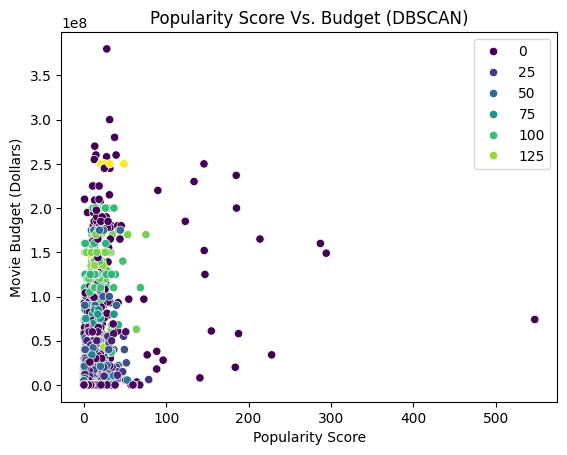

In [350]:
# DBSCAN with EPS = 50, and min samples = 8
dbscan_cluster = DBSCAN(eps=50, min_samples=8).fit(x_pop_budget)
sns.scatterplot(data=dataset, x=dataset['popularity'], y=dataset['budget'], hue=list(dbscan_cluster.labels_), palette='viridis')
plt.title('Popularity Score Vs. Budget (DBSCAN)')
plt.xlabel('Popularity Score')
plt.ylabel('Movie Budget (Dollars)')
plt.show()

DBSCAN on Vote Count Vs. Budget with EPS = 15, and min_samples = 5.

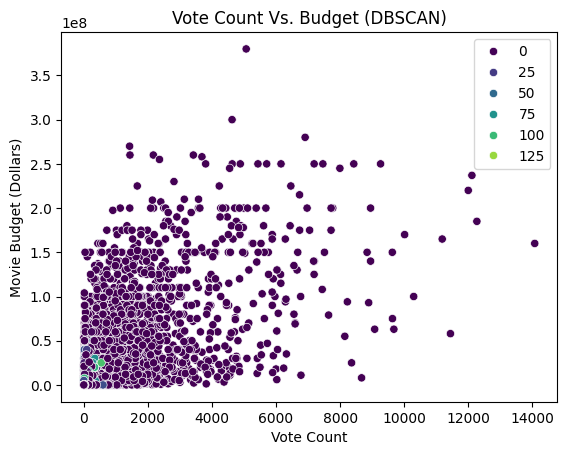

In [351]:
# DBSCAN with EPS = 15, and min samples = 5
dbscan_cluster = DBSCAN(eps=10, min_samples=6).fit(x_vote_budget)
sns.scatterplot(data=dataset, x=dataset['vote_count'], y=dataset['budget'], hue=list(dbscan_cluster.labels_), palette='viridis')
plt.title('Vote Count Vs. Budget (DBSCAN)')
plt.xlabel('Vote Count')
plt.ylabel('Movie Budget (Dollars)')
plt.show()

DBSCAN on Vote Count Vs. Budget with EPS = 50, and min_samples = 8.

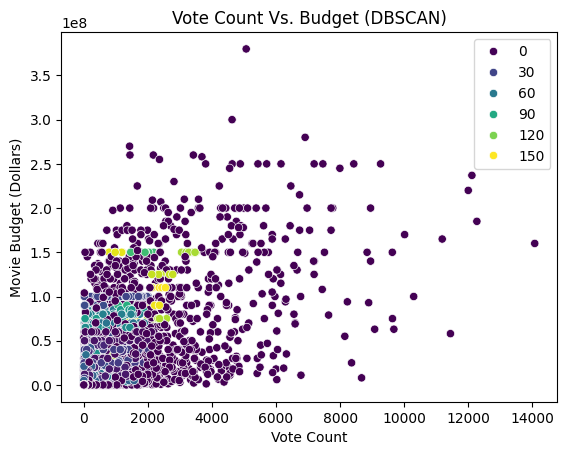

In [352]:
# DBSCAN with EPS = 250, and min samples = 8
dbscan_cluster = DBSCAN(eps=250, min_samples=6).fit(x_vote_budget)
sns.scatterplot(data=dataset, x=dataset['vote_count'], y=dataset['budget'], hue=list(dbscan_cluster.labels_), palette='viridis')
plt.title('Vote Count Vs. Budget (DBSCAN)')
plt.xlabel('Vote Count')
plt.ylabel('Movie Budget (Dollars)')
plt.show()

### Study 2 Results Analysis:
1. Popularity Vs. Budget:
The KMeans results for k=2 provide two clear clusters, however, not much useful information can be discerened with only two clusters in this case as the data is spread far across the y-axis and includes too many outliers. K=4 is a better parameter choice for this data as each of the 4 clusters include certain bands of the budget. In comparison to DBSCAN, since the data includes many dense subclusters within the main large concentration of data points, the DBSCAN algorithm failed to form any proper clusters on my selected parameter values of eps = 15, 50 , and min_samples 5, 8.

2. Vote Count Vs. Budget:
The results for the vote count and budget comparison provides largely the same result as the popularity vs budget comparison. The k = 4 was better suited for showing the individual clusters, and their groupings that were mostly separated by budgetary bands. The upper cluster shows us that with a larger budget it is more likely to have a greater number of votes. This is likely due to having a higher advertising budget, and thus more people will have seen the movie, and thus provided their opinion on it. DBSCAN had similar results to the popularity vs. budget comparison, and no meaningful clusters were formed. No matter the parameters, no proper clusters were forming, only mixed smaller clusters that were spread out through the one larger cluster. 

## References:
<ul>
<li>
<a href="https://www.analyticsvidhya.com/blog/2024/02/ways-to-convert-string-to-a-list-in-python/">Parsing StringList using ast</a>
</li>
<li>
<a href="https://en.wikipedia.org/wiki/Hamming_distance">Hamming Similarity Implementations</a>
</li>
</li>
<li>
<a href="https://pandas.pydata.org/docs/user_guide/index.html">General Pandas info</a>
</li>
<li>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">SkLearn KMeans</a>
</li>
<li>
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">SkLearn DBSCAN</a>
</li>
</ul>